<a href="https://colab.research.google.com/github/dangcaptkd/temp1/blob/master/Fruit_recognition_using_color_extraction4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow
import pandas as pd

In [36]:
def clustering_image(img):
  #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  vectorized = img.reshape((-1,3))
  vectorized = np.float32(vectorized)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 2
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  return result_image, center

In [39]:
def remove_light_color(img, center_color):
  light_color = max(sum(center_color[0]), sum(center_color[1]))
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      if sum(img[x][y]) == light_color:
        img[x][y][0]=0
        img[x][y][1]=0
        img[x][y][2]=0
  return img

done 10 image


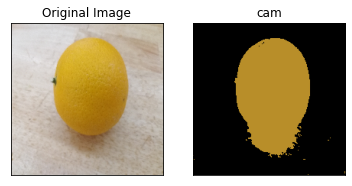

done 20 image


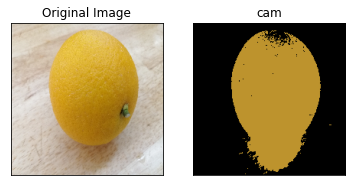

done 30 image


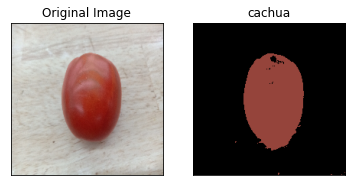

done 40 image


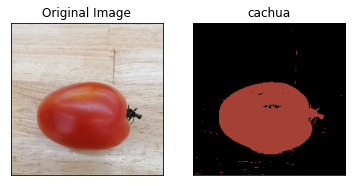

done 50 image


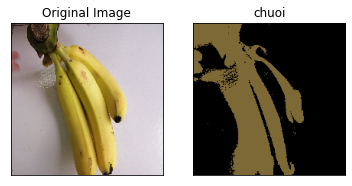

done 60 image


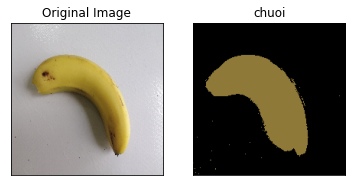

In [40]:
path = '/content/drive/My Drive/học kì 4 uit/Fruit_60_imgs'
folder_name = os.listdir(path)
dataset_train = {}
dataset_test = {}
test_size = 0.25
number = 1
dim = (200, 200)
for name in folder_name:
  images_train = []
  images_test = []
  for img in os.listdir(path+'/'+name):
    fruit_img = cv2.imread(path+'/'+name+'/'+img)
    fruit_img = cv2.resize(fruit_img, dim)
    fruit_img = cv2.cvtColor(fruit_img,cv2.COLOR_BGR2RGB)

    cluster_img, center_color = clustering_image(fruit_img)

    cluster_img = remove_light_color(cluster_img, center_color)

    if len(images_test) < test_size*(len(os.listdir(path+'/'+name))):
      images_test.append(cluster_img)
    else:
      images_train.append(cluster_img)
    #cv2_imshow(rb_img)
    if number%10==0:
      print('done {} image'.format(number))
      figure_size = 6
      plt.figure(figsize=(figure_size,figure_size))

      plt.subplot(1,2,1),plt.imshow(fruit_img)
      plt.title('Original Image'), plt.xticks([]), plt.yticks([])

      plt.subplot(1,2,2),plt.imshow(cluster_img)
      plt.title(name), plt.xticks([]), plt.yticks([])

     
      plt.show()

    number+=1
  dataset_train[name] = images_train
  dataset_test[name] = images_test

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

In [43]:
image = dataset_test['cachua'][0]

In [44]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

[[ 2.45492515e-11 -7.08411108e-12 -9.91207116e-12]
 [ 1.74000000e+02  1.12000000e+02  8.90000000e+01]]


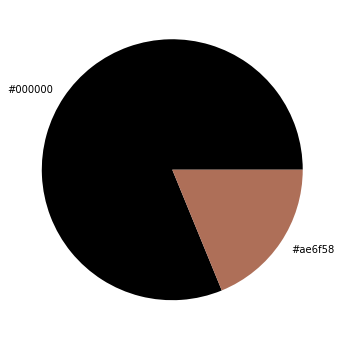

In [45]:
#modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)

clf = KMeans(n_clusters = 2)
labels = clf.fit_predict(modified_image)

counts = Counter(labels)

# sort to ensure correct color percentage
counts = dict(sorted(counts.items()))

center_colors = clf.cluster_centers_
print(center_colors)
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

if (True):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [46]:
def create_df_with_many_images(dataset):
  columns_name = ['name', 'red_mean', 'red_std', 'green_mean', 'green_std', 'blue_mean', 'blue_std']
  red_means = []
  red_stds = []
  green_means = []
  green_stds = []
  blue_means = []
  blue_stds = []
  names = []
  for fruit in dataset:
    for img in dataset[fruit]:
      red_channel = img[:,:,0]
      green_channel = img[:,:,1]
      blue_channel = img[:,:,2]
      #blue_channel[blue_channel == 255] = 0
      #green_channel[green_channel == 255] = 0
      #red_channel[red_channel == 255] = 0

      red_mean = np.mean(red_channel)
      green_mean = np.mean(green_channel)
      blue_mean = np.mean(blue_channel)
      
      red_std = np.std(red_channel)
      green_std = np.std(green_channel)
      blue_std = np.std(blue_channel)

      red_means.append(red_mean)
      red_stds.append(red_std)
      green_means.append(green_mean)
      green_stds.append(green_std)
      blue_means.append(blue_mean)
      blue_stds.append(blue_std)
      names.append(fruit)
      
  data = {'name': names, 'red_mean': red_means, 'red_std': red_stds, 'green_mean': green_means, 
          'green_std': green_stds, 'blue_mean': blue_means, 'blue_std': blue_stds}
  df = pd.DataFrame(data)
  return df

In [47]:
df_train = create_df_with_many_images(dataset_train)
df_test = create_df_with_many_images(dataset_test)

In [48]:
df_train.head()

,name,red_mean,red_std,green_mean,green_std,blue_mean,blue_std
0,cam,96.859350,96.999898,74.391975,74.499922,26.461575,26.499972
1,cam,43.819650,79.760593,33.386400,60.769975,8.114750,14.770480
2,cam,49.889875,82.101323,39.642225,65.237268,11.865700,19.526801
3,cam,53.719650,83.336038,42.271200,65.575898,12.035550,18.670916
4,cam,52.729800,83.197665,40.693650,64.206893,11.749575,18.538610


In [49]:
df_train = df_train.sample(frac=1, random_state=1)
df_test = df_test.sample(frac=1, random_state=1)

In [50]:
Y_train = df_train['name']
X_train = df_train.drop(['name'], axis=1)
Y_test = df_test['name']
X_test = df_test.drop(['name'], axis=1)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(45, 6)
(15, 6)
(45,)
(15,)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [53]:
models = []
models.append(('rfc', RandomForestClassifier()))
models.append(('svc', SVC()))
models.append(('knn', KNeighborsClassifier()))


for name, model in models:
  print(name)
  model.fit(X_train, Y_train)
  #print('\ttrain', accuracy_score(Y_train, Y_test))
  pred = model.predict(X_test)
  print('\ttest', accuracy_score(Y_test, pred))

rfc
	test 0.8
svc
	test 0.9333333333333333
knn
	test 0.9333333333333333


In [54]:
def create_df_with_one_img(img):
  columns_name = ['red_mean', 'red_std', 'green_mean', 'green_std', 'blue_mean', 'blue_std']
  red_means = []
  red_stds = []
  green_means = []
  green_stds = []
  blue_means = []
  blue_stds = []

  
  red_channel = img[:,:,0]
  green_channel = img[:,:,1]
  blue_channel = img[:,:,2]
  #blue_channel[blue_channel == 255] = 0
  #green_channel[green_channel == 255] = 0
  #red_channel[red_channel == 255] = 0

  red_mean = np.mean(red_channel)
  green_mean = np.mean(green_channel)
  blue_mean = np.mean(blue_channel)
  
  red_std = np.std(red_channel)
  green_std = np.std(green_channel)
  blue_std = np.std(blue_channel)

  red_means.append(red_mean)
  red_stds.append(red_std)
  green_means.append(green_mean)
  green_stds.append(green_std)
  blue_means.append(blue_mean)
  blue_stds.append(blue_std)

  data = {'red_mean': red_means, 'red_std': red_stds, 'green_mean': green_means, 
          'green_std': green_stds, 'blue_mean': blue_means, 'blue_std': blue_stds}
  df = pd.DataFrame(data)
  df.head()
  return df

In [56]:
img = cv2.imread('/content/chuoi.jpg')
resized_img = cv2.resize(img, (200, 200))
img, center = clustering_image(resized_img)
img = remove_light_color(img, center_color)

df = create_df_with_one_img(img)
df.head()

,red_mean,red_std,green_mean,green_std,blue_mean,blue_std
0,154.843225,95.350406,221.206475,30.452224,241.5595,9.984336


In [57]:
for name, model in models:
  pred = model.predict(df)
  print(name, pred)

rfc ['cam']
svc ['cam']
knn ['cam']
